## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "redlichKwong",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["hard"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_blyiho9t",
        "subtopics": [
            {
              "key": "Fa25-L3b-6.0",
              "title": "van der Waals equation of state",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 3,
        "title": "Properties of Pure Substances",
        "sections": [
            "Other Equations of State",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
**Goal**: Plot the isotherms at the critical point of water using `pyCalor` and the Redlich-Kwong equation of state. 

## 2. Schematic
No schematic

## 3. Assumptions and Approximations
* **State Postulate** The state postulate allows a finite number of properties to be specified in order to fully describe a state of thermodynamic equilibrium.
* **Pure Substance** We only need two independent variables to determine the state.

## 4. Physical Laws and Governing Equations
The Redlich-Kwong equation for water can be written as:

$$p = \frac{R T}{v - b} - \frac{a}{v \sqrt{T} (v + b)} $$

where $p$ is pressure, $v$ is specific volume, $R$ is the specific gas constant, $T$ is temperature, and $a$ and $b$ are constants.

In [1]:
## 5. Properties (Code Cell)
!pip install pyCalor

from pyCalor import thermo as th
import numpy as np
import matplotlib.pyplot as plt

# critical point of water
Tc_K = 647.096 
pc_Pa = 22.060e6

# triple point of water
Ttp_K = 273.16
ptp_Pa = 611.6

Text(0, 0.5, '$p$ (MPa)')

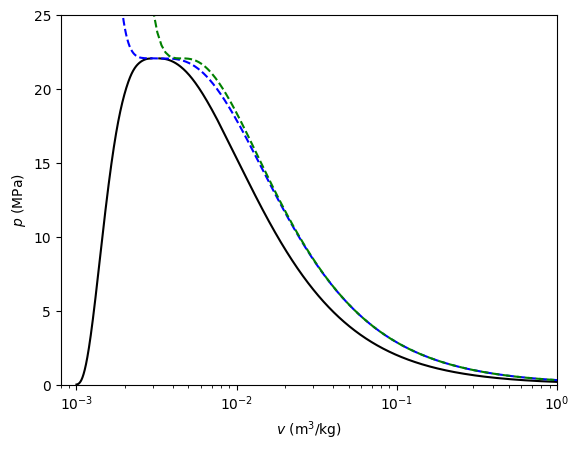

In [2]:
# 6 Calculations (Code Cell)
plt.figure()
plt.clf()

plt.xscale("log")
# plot the saturated liquid and saturated vapor lines
P = np.linspace(ptp_Pa, pc_Pa, 1000) # range of pressures
vvap = [s.v for s in [th.state('Water', x=1, p=(p,'Pa')) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=(p,'Pa')) for p in P]]
plt.plot(vvap, P/1e6, 'k-') # plot the pressure in MPa
plt.plot(vliq, P/1e6, 'k-') # plot the pressure in MPa

# plot the isotherm for the critical temperature using pyCalor
P_ = np.linspace(ptp_Pa/1e6, 30, 1000) # range of pressures, MPa
st = [th.state('Water', p=(p*1e3,'kPa'), T=(Tc_K,'K')) for p in P_]
v = [s.v for s in st]
plt.xscale("log")
plt.plot(v, P_, 'b--')

# plot the isotherm for the critical temperature using Redlich-Kwong
R_JperKgPerK = 461.5
a = 0.42748*((R_JperKgPerK**2)*(Tc_K**2.5))/pc_Pa
b = 0.08664*(R_JperKgPerK*Tc_K)/pc_Pa
v_ = np.linspace(3e-3, 1, 5000)
# Redlich-Kwong equation of state:
p_ = ((R_JperKgPerK*Tc_K)/(v_ - b)) - a/((Tc_K**0.5)*v_*(v_ + b))
plt.plot(v_, p_/1e6, 'g--')

ax = plt.gca()
xmin = 0.8e-3
xmax = 1
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 25
ax.set_ylim([ymin, ymax])

ax.set_xlabel('$v$ (m$^3$/kg)')
ax.set_ylabel('$p$ (MPa)')

## 7. Summary and Reasoning
We were able to plot critical temperature isotherms for water using `pyCalor`, the Redlich-Kwong equation of state. The isotherms match very well for specific volume values greater than the critical specific volume. It would be interesting to see how this equation of state behaves for temperature values less than the critical temperature. Especially if it is possible to define the lines of saturation using this equation of state.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---